# OBJECTIVE
The Objective of this project is to classify MNIST Handwritten Digits using Naive Bayes Algorithm.
This method is a set of supervised learning algorithms based on applying Baye's theorem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare Dataset

In [2]:
#converting of the mnist dataset to csv file format

def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("mnist/train-images-idx3-ubyte", "mnist/train-labels-idx1-ubyte", "mnist_train.csv", 60000)
convert("mnist/t10k-images-idx3-ubyte", "mnist/t10k-labels-idx1-ubyte", "mnist_test.csv", 10000)

In [8]:
mnist=pd.read_csv("mnist_train.csv", header=None)
labels = pd.read_csv('test.csv')
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x=mnist.iloc[:, 1:].values
y=mnist.iloc[:,0].values
labels = labels.iloc[0:784, 0].values 

In [10]:
print(x.dtype, y.dtype, labels.dtype)
print(x.shape, y.shape, labels.shape)


int64 int64 int64
(60000, 784) (60000,) (784,)


In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
min(5, len(mnist))

5

In [13]:
def plot_images(mnist, labels):
    n_cols= min(5, len(mnist))
    n_rows=len(mnist)//n_cols
    fig=plt.figure(figsize=(8,8))
    
    
    for i in range(n_rows * n_cols):
        sp=fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis('off')
        plt.imshow(mnist[i],  cmap=plt.cm.gray)
        sp.set_title(labels[i])
plt.show()


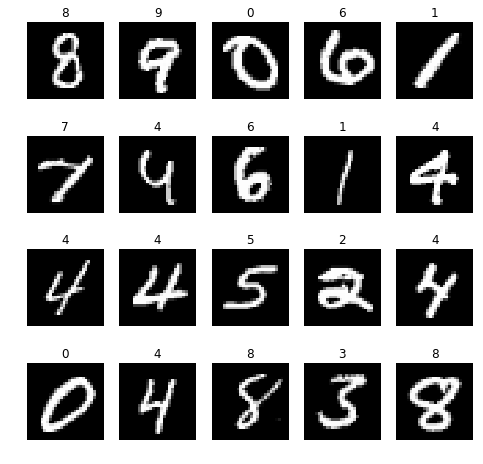

In [14]:
#Plotting random 20 images
p=np.random.permutation(len(x))
p=p[:20]
plot_images(x[p].reshape(-1, 28, 28), y[p])
plt.show()



In [15]:
#y.astype('int32')
#x = x/255.0

In [16]:
#x.min(), x.max()

In [17]:
#splitting the dataset into train asnd test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, )

In [18]:
# fitting the train sets into the algorithm
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=3,  )
cls.fit(x_train, y_train)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [ ]:
#from sklearn.naive_bayes import GaussianNB
#Gnb = GaussianNB()
#Gnb.fit(x_train, y_train)
cls.partial_fit(x,y, classes=None, sample_weight=None)

In [ ]:
cls.score(x_test, y_test)

In [ ]:
#predicting the model
from sklearn.metrics import classification_report, confusion_matrix
prediction = cls.predict(x_test)
print(classification_report(y_test, prediction))

In [ ]:
#Plotting random 20 images
p=np.random.permutation(len(x_test))
p=p[:20]
plot_images(x_test[p].reshape(-1, 28, 28), prediction[p])

In [ ]:
confusion_matrix(y_test, prediction) # to know the correct values thats are rightfully predicted 